In [1]:
import time
import subprocess as subp

import matplotlib.pyplot as plt
import numpy as np

In [1]:
content = []
with open("./samples/pattern.txt", "r") as f:
    content = f.readline()

x = [2, 4, 6, 8, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [3]:
y_shiftor = []
y_boyer = []
y_grep =[]

for n in x:
    pattern = content[:n]

    t1 = time.time()
    subp.check_call(["pmt", "-l", "-a", "shiftor", pattern, "samples/dna.200MB"])
    t2 = time.time()
    y_shiftor.append(t2 - t1)

    t1 = time.time()
    subp.check_call(["pmt", "-l", "-a", "boyermoore", pattern, "samples/dna.200MB"])
    t2 = time.time()
    y_boyer.append(t2 - t1)

    t1 = time.time()
    subp.check_call(["grep", "-c", pattern, "samples/dna.200MB"])
    t2 = time.time()
    y_grep.append(t2 - t1)

The pattern GA was found in 1114 lines in the given text.
The pattern GA occurred in 1114 lines of the given text.
1114
The pattern GATC was found in 1114 lines in the given text.
The pattern GATC occurred in 1114 lines of the given text.
1114
The pattern GATCAA was found in 1105 lines in the given text.
The pattern GATCAA occurred in 1105 lines of the given text.
1105
The pattern GATCAATG was found in 863 lines in the given text.
The pattern GATCAATG occurred in 863 lines of the given text.
863
The pattern GATCAATGAG was found in 232 lines in the given text.
The pattern GATCAATGAG occurred in 232 lines of the given text.
232
The pattern GATCAATGAGGTGGACACCA was found in 1 lines in the given text.
The pattern GATCAATGAGGTGGACACCA occurred in 1 lines of the given text.
1
The pattern GATCAATGAGGTGGACACCAGAGGCGGGGA was found in 1 lines in the given text.
The pattern GATCAATGAGGTGGACACCAGAGGCGGGGA occurred in 1 lines of the given text.
1
The pattern GATCAATGAGGTGGACACCAGAGGCGGGGACTTGTAAATA

In [4]:
y_wumanber = []
y_sellers = []

for n in x:
    pattern = content[:n]
    t1 = time.time()
    subp.check_call(["pmt", "-c", "-a", "wumanber", "-e", "1", pattern, "samples/dna.200MB"])
    t2 = time.time()
    y_wumanber.append(t2 - t1)

for n in x:
    pattern = content[:n]
    t1 = time.time()
    subp.check_call(["pmt", "-c", "-a", "sellers", "-e", "1", pattern, "samples/dna.200MB"])
    t2 = time.time()
    y_sellers.append(t2 - t1)

The pattern GA occurred (with a maximum edit cost of 1) 129032614 times in the given text.
The pattern GATC occurred (with a maximum edit cost of 1) 15863653 times in the given text.
The pattern GATCAA occurred (with a maximum edit cost of 1) 1935945 times in the given text.
The pattern GATCAATG occurred (with a maximum edit cost of 1) 166528 times in the given text.
The pattern GATCAATGAG occurred (with a maximum edit cost of 1) 17191 times in the given text.
The pattern GATCAATGAGGTGGACACCA occurred (with a maximum edit cost of 1) 3 times in the given text.
The pattern GATCAATGAGGTGGACACCAGAGGCGGGGA occurred (with a maximum edit cost of 1) 3 times in the given text.
The pattern GATCAATGAGGTGGACACCAGAGGCGGGGACTTGTAAATA occurred (with a maximum edit cost of 1) 2980036 times in the given text.
The pattern GATCAATGAGGTGGACACCAGAGGCGGGGACTTGTAAATAACACTGGGCT occurred (with a maximum edit cost of 1) 1024 times in the given text.
The pattern GATCAATGAGGTGGACACCAGAGGCGGGGACTTGTAAATAACACTGGGCT

In [5]:
y_agrep = []
x_agrep = [2, 4]

for n in x_agrep:
    pattern = content[:n]
    t1 = time.time()
    subp.check_call(["agrep", "-c", "-1", pattern, "samples/dna.200MB"])
    t2 = time.time()
    y_agrep.append(t2 - t1)

43780
1001855


In [6]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

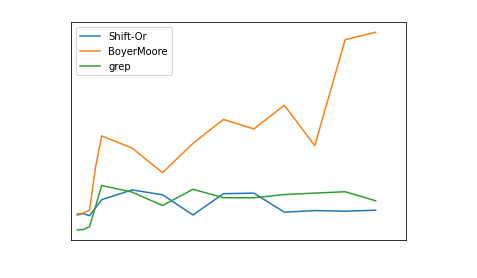

In [7]:
# plot
fig, ax = plt.subplots()

ax.plot(x, y_shiftor, label='Shift-Or')
ax.plot(x, y_boyer, label='BoyerMoore')
ax.plot(x, y_grep, label='grep')

ax.set(xlim=(0, 110), xticks=np.arange(0, 110, 10))

plt.title("Eficiência dos algoritmos de busca exata de acordo com tamanho do padrão")
plt.xlabel("Tamanho do padrão")
plt.ylabel("Tempo de execução")

plt.legend(labelcolor='black', loc='best')
plt.show()

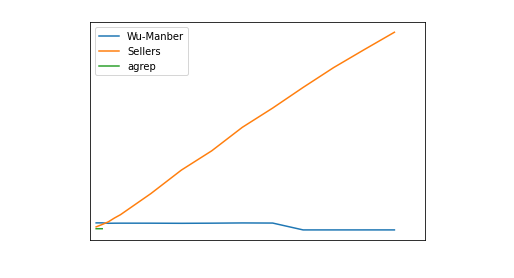

In [8]:
# plot
fig, ax = plt.subplots()

ax.plot(x, y_wumanber, label='Wu-Manber')
ax.plot(x, y_sellers, label='Sellers')
ax.plot(x_agrep, y_agrep, label='agrep')

ax.set(xlim=(0, 110), xticks=np.arange(0, 110, 10))

plt.title("Eficiência dos algoritmos de busca aproximada de acordo com tamanho do padrão")

plt.xlabel("Tamanho do padrão")
plt.ylabel("Tempo de execução")

plt.legend(labelcolor='black', loc='best')
plt.show()